# Clasificación y regresión de cáncer de mama en Wisconsin
* **Nombre del proyecto:** Redes Neuronales
* **Nombre de la universidad:** Universidad Panamericana - Campus Ciudad de México
* **Nombre de la materia:** Inteligencia Artificial
* **Integrantes del Equipo:** Sara Miranda, Ivanna Tinedo, Christian Matos, Dania Venegas
* **Fecha de entrega:** 31 de mayo de 2023
* **Versión de código:** 0.2
* Este archivo contiene el entrenamiento de la red neuronal con los datos, su graficación, su clasificación y su modelo de regresión.
* Para ejecutar el código, abra este archivo como un cuaderno de jupyter en un entorno como Anaconda o Google Collab y ejecute todas las celdas.

# Dependencias

In [175]:
# Bibliotecas para manipular los datos y visualizarlos
import pandas as pd
import numpy as np
from math import sqrt

# Bibliotecas para la graficación
import matplotlib.pyplot as plt
import seaborn as sn

# Biblioteca para la manipulación de datos y creación de redes neuronales
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Métricas de evaluación para la clasificación
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

# Métricas de evaluación para regresión
from sklearn.metrics import r2_score
from sklearn.metrics import max_error
from sklearn.metrics import explained_variance_score

# Para la sintonización de los híperparámetros
from sklearn.model_selection import GridSearchCV

# Sobre los datos
Los datos usados para este modelo de red neuronal corresponden a un estudio de 569 diagnósticos de cáncer de mama en hospitales de Universidad de Wisconsin hasta noviembre de 1995. Los datos fueron computados a partit de imágenes digitalizadas del procedimiento de diagnóstico Fine-Needle Aspiration (FNA). Los datos fueron donados por Nick Street al Machine Learning Repository de UCI en https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29. 

Sus creadores son:

1. Dr. William H. Wolberg, General Surgery Dept.
University of Wisconsin, Clinical Sciences Center
Madison, WI 53792
wolberg '@' eagle.surgery.wisc.edu

1. W. Nick Street, Computer Sciences Dept.
University of Wisconsin, 1210 West Dayton St., Madison, WI 53706
street '@' cs.wisc.edu 608-262-6619

1. Olvi L. Mangasarian, Computer Sciences Dept.
University of Wisconsin, 1210 West Dayton St., Madison, WI 53706
olvi '@' cs.wisc.edu

Estos datos fueron usados originalmente para los siguientes estudios: 
   1. O. L. Mangasarian and W. H. Wolberg: "Cancer diagnosis via linear 
      programming", SIAM News, Volume 23, Number 5, September 1990, pp 1 & 18.

   2. William H. Wolberg and O.L. Mangasarian: "Multisurface method of 
      pattern separation for medical diagnosis applied to breast cytology", 
      Proceedings of the National Academy of Sciences, U.S.A., Volume 87, 
      December 1990, pp 9193-9196.

   3. O. L. Mangasarian, R. Setiono, and W.H. Wolberg: "Pattern recognition 
      via linear programming: Theory and application to medical diagnosis", 
      in: "Large-scale numerical optimization", Thomas F. Coleman and Yuying
      Li, editors, SIAM Publications, Philadelphia 1990, pp 22-30.

   4. K. P. Bennett & O. L. Mangasarian: "Robust linear programming 
      discrimination of two linearly inseparable sets", Optimization Methods
      and Software 1, 1992, 23-34 (Gordon & Breach Science Publishers).




# Información de atributos
1. Número de identificación
2. Diagnóstico (M = maligno, B = benigno)

Se calculan diez características de valor real para cada núcleo celular:

1. Radio (promedio de distancias desde el centro hasta los puntos en el perímetro)
2. Textura (desviación estándar de los valores en escala de grises)
3. Perímetro
4. Área
5. Suavidad (variación local en las longitudes de radio)
6. Compacidad (perímetro^2 / área - 1.0)
7. Concavidad (gravedad de las porciones cóncavas del contorno)
8. Puntos cóncavos (número de porciones cóncavas del contorno)
9. Simetría
10. Dimensión fractal ("aproximación de la línea costera" - 1)



# Importación de datos

In [176]:
# Generar un dataframe de pandas con el archivo que contiene el conjunto de datos
dataset = pd.read_csv(filepath_or_buffer = 'breast-cancer-wisconsin.data', names = ['sample_code','clump_thickness','cell_size','cell_shape', 'marginal_adhesion', 'epithelial_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'classd'])

# Eche un vistazo a los datos
print('The dataset contains {} observations and {} features\n'.format(dataset.shape[0],dataset.shape[1]))

dataset.head()

The dataset contains 699 observations and 11 features



,sample_code,clump_thickness,cell_size,cell_shape,marginal_adhesion,epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,classd
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [177]:
# Convierte los dos valores de classd a cadenas de caracteres
diagnostics_mapping = {'2': 'benign',  '4': 'malignant'}
dataset['classd'] = dataset['classd'].astype(str)
dataset['classd'] = dataset['classd'].replace(diagnostics_mapping)

dataset.head()

,sample_code,clump_thickness,cell_size,cell_shape,marginal_adhesion,epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,classd
0,1000025,5,1,1,1,2,1,3,1,1,benign
1,1002945,5,4,4,5,7,10,3,2,1,benign
2,1015425,3,1,1,1,2,2,3,1,1,benign
3,1016277,6,8,8,1,3,4,3,7,1,benign
4,1017023,4,1,1,3,2,1,3,1,1,benign


In [178]:
# Verifique cuántas observaciones tenemos para cada categoría de benigno y maligno.
dataset.groupby('classd').size()

classd
benign       458
malignant    241
dtype: int64

# Análisis de 5 números

In [179]:
# Use el análisis de cinco números para explorar estatiscalmente el conjunto de datos.
dataset.describe()

,sample_code,clump_thickness,cell_size,cell_shape,marginal_adhesion,epithelial_size,bland_chromatin,normal_nucleoli,mitoses
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


# Gráfica del conjunto de datos

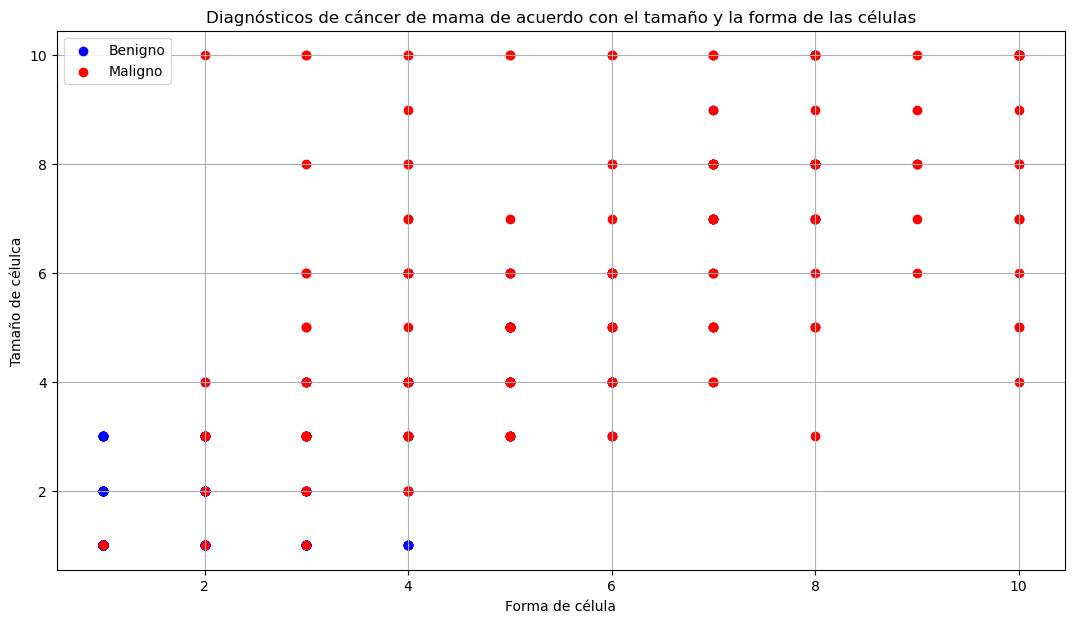

In [180]:
# Grafique el tamaño de células y la forma de células con diagnósticos benignos y malignos.
benign = dataset[dataset.classd == 'benign']
malign = dataset[dataset.classd == 'malignant']

fig, ax = plt.subplots()
fig.set_size_inches(13, 7) # adjusting the length and width of plot

# Etiquetas y puntos de dispersión
ax.scatter(benign['cell_shape'], benign['cell_size'], label="Benigno", facecolor="blue")
ax.scatter(malign['cell_shape'], malign['cell_size'], label="Maligno", facecolor="red")


ax.set_xlabel("Forma de célula")
ax.set_ylabel("Tamaño de célulca")
ax.grid()
ax.set_title("Diagnósticos de cáncer de mama de acuerdo con el tamaño y la forma de las células")
ax.legend()

# Conjunto de datos para entrenamiento

In [181]:
# Tomaremos classd como nuestra característica de interés.
# X será nuestro conjunto de datos sin la característica de interés.
X = dataset.drop('classd', axis=1)

# Convertir en una matriz numpy y asignar el tamaño y la forma de las células como características.
X = X.to_numpy()[:, (2,3)]

# Y será nuestra característica de interés.
y = dataset['classd']

# Dividir para entrenamiento y prueba en proporciones de la mitad.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=42)

print('Los valores min del conjunto de datos son: \n{}'.format(dataset.min()))
print('Los valores máximos del conjunto de datos son: \n{}'.format(dataset.max()))

Los valores min del conjunto de datos son: 
sample_code           61634
clump_thickness           1
cell_size                 1
cell_shape                1
marginal_adhesion         1
epithelial_size           1
bare_nuclei               1
bland_chromatin           1
normal_nucleoli           1
mitoses                   1
classd               benign
dtype: object
Los valores máximos del conjunto de datos son: 
sample_code           13454352
clump_thickness             10
cell_size                   10
cell_shape                  10
marginal_adhesion           10
epithelial_size             10
bare_nuclei                  ?
bland_chromatin             10
normal_nucleoli             10
mitoses                     10
classd               malignant
dtype: object


# Escalamiento de los datos

In [182]:
# Dado que los valores de las características son de diferentes rangos, 
# es necesario escalarlos ya que los modelos de ML son sensibles a estas variaciones.
scaler = StandardScaler()

# scaler = sc.fit(X_train)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

print('Los valores min del conjunto de datos son: \n{}'.format(X_train_scaled.min()))
print('Los valores máximos del conjunto de datos son: \n{}'.format(X_train_scaled.max()))

Los valores min del conjunto de datos son: 
-0.7449149782167317
Los valores máximos del conjunto de datos son: 
2.320275080096454


# Clasificación

## Definición del modelo base

In [183]:
# Definición de un clasificador de perceptrones múltiples.
# Es una red neuronal artificial que utiliza la función de activación logística.
mlp_clf = MLPClassifier(
    # Definiendo el número de capas ocultas y el número de neuronas en cada capa.
    hidden_layer_sizes=(2),
    # Máximo número de iteraciones para el solucionador de optimización.
    max_iter = 2000,
    # Tolerancia para la optimización.
    learning_rate_init = 0.001,
    # Función de activación para la capa oculta. relu = la unidad lineal rectificada f(x) = max(0, x)
    activation = 'relu',
    # Optimizador de los pesos. adam = optimizador basado en gradiente estocástico propuesto por Kingma, Diederik, y Jimmy Ba
    solver = 'adam'
    )

## Entrenamiento del modelo base

In [184]:
# Entrene el modelo con los datos de entrenamiento.
mlp_clf.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=2, max_iter=3000)

## Pruebas del modelo base

In [185]:
# Pasar el conjunto de datos que hemos preparado para las pruebas
y_pred = mlp_clf.predict(X_test_scaled)
y_pred

array(['benign', 'benign', 'benign', 'malignant', 'benign', 'benign',
       'benign', 'malignant', 'malignant', 'benign', 'benign',
       'malignant', 'benign', 'benign', 'benign', 'malignant', 'benign',
       'malignant', 'malignant', 'malignant', 'malignant', 'benign',
       'malignant', 'benign', 'malignant', 'benign', 'benign',
       'malignant', 'benign', 'malignant', 'benign', 'benign', 'benign',
       'malignant', 'benign', 'benign', 'benign', 'malignant', 'benign',
       'malignant', 'benign', 'benign', 'malignant', 'benign', 'benign',
       'benign', 'benign', 'malignant', 'benign', 'benign', 'benign',
       'benign', 'malignant', 'benign', 'malignant', 'benign', 'benign',
       'malignant', 'benign', 'benign', 'benign', 'benign', 'malignant',
       'benign', 'benign', 'benign', 'malignant', 'malignant', 'benign',
       'benign', 'benign', 'benign', 'malignant', 'benign', 'benign',
       'benign', 'benign', 'benign', 'benign', 'benign', 'benign',
       'benign', 

## Evaluación del modelo base


In [186]:
# https://scikit-learn.org/stable/modules/model_evaluation.html

# Exactitud
print('Exactitud: {:.2f}'.format(accuracy_score(y_test, y_pred)))
# Precisión, recuperación, puntaje F1 y soporte
print(classification_report(y_test, y_pred))

Exactitud: 0.94
              precision    recall  f1-score   support

      benign       0.95      0.96      0.96       226
   malignant       0.93      0.90      0.92       124

    accuracy                           0.94       350
   macro avg       0.94      0.93      0.94       350
weighted avg       0.94      0.94      0.94       350



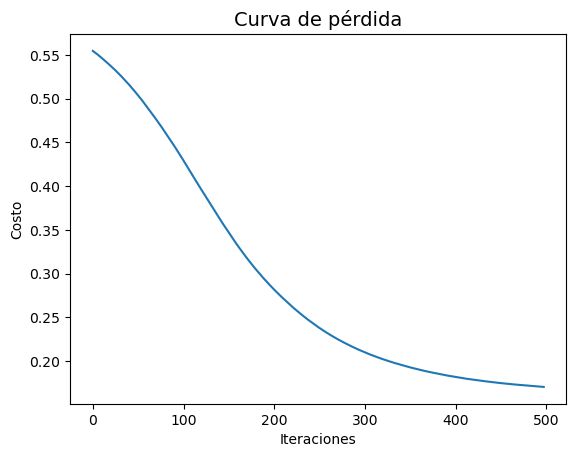

In [187]:
# Vea qué tan bien fue el entrenamiento del modelo
plt.plot(mlp_clf.loss_curve_)
plt.title("Curva de pérdida", fontsize=14)
plt.xlabel('Iteraciones')
plt.ylabel('Costo')
plt.show()

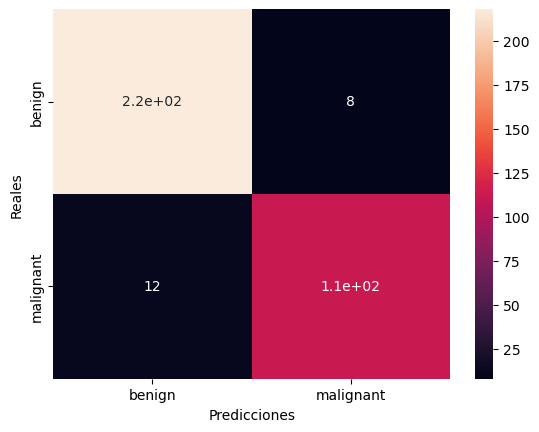

In [188]:
# Generar la matriz de confusión
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Reales'], colnames=['Predicciones'])
sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [189]:
# Eche un vistazo a las predicciones
y_pred_pd = pd.DataFrame(y_pred)
print('Predicciones \n{}\n'.format(y_pred_pd.describe()))

# Eche un vistazo a los verdaderos ejemplos
print('Verdadero Ejemplos \n{}'.format(y_test.describe()))

Predicciones 
             0
count      350
unique       2
top     benign
freq       230

Verdadero Ejemplos 
count        350
unique         2
top       benign
freq         226
Name: classd, dtype: object


## Definición de la búsqueda de hiper-parámetros

In [190]:
# Definir un conjunto de parámetros que estamos interesados en entrenar con nuestro modelo
param_grid = {
    'hidden_layer_sizes': [(1800,1200,500), (120,80), (100)],
    'max_iter': [600, 1200, 1800],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    # Fuerza del término de regularización de L2, que agrega una penalización a los pesos de los parámetros.
    'alpha': [0.0001, 0.05],
    # Un valor que funciona como la temperatura en el algoritmo de recocido simulado
    'learning_rate': ['constant','adaptive'],
}

In [191]:
grid = GridSearchCV(
    # El modelo que estamos entrenando, en este caso un clasificador de perceptrones múltiples
    mlp_clf,
    # Los diferentes híperparámetros que queremos entrenar
    param_grid,
    # Número de procesos que se ejecutarán en paralelo. Si se establece en -1, se utilizarán todos los procesadores.
    n_jobs = -1,
    # Número de veces que se repite la validación cruzada con diferentes conjuntos de entrenamiento y prueba.
    cv = 5
    )

In [192]:
# Ajustar el modelo a los datos de entrenamiento (puede demorar)
grid.fit(X_train_scaled, y_train)

## Ejecución de la búsqueda de hiper-parámetros

In [ ]:
# Consigue los mejores valores para los hiper-parámetros entrenados
print('Los mejores valores de híperparámetros son:\n{}'.format(grid.best_params_))

The best hyper parameter values are:
{'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'adaptive', 'max_iter': 150, 'solver': 'sgd'}


In [ ]:
# Guarde los resultados como Pandas DataFrame para interactuar fácilmente con los datos
grid_results = pd.DataFrame(grid.cv_results_)

In [ ]:
grid_results.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_hidden_layer_sizes,param_learning_rate,param_max_iter,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
143,0.200508,0.013730,0.000416,0.000511,relu,0.05,100,adaptive,150,adam,"{'activation': 'relu', 'alpha': 0.05, 'hidden_...",0.971429,0.957143,0.971429,0.914286,0.927536,0.948364,0.023393,1
137,0.242531,0.016256,0.000804,0.000402,relu,0.05,100,constant,150,adam,"{'activation': 'relu', 'alpha': 0.05, 'hidden_...",0.971429,0.957143,0.971429,0.914286,0.927536,0.948364,0.023393,1
53,1.405921,0.151823,0.002114,0.000485,tanh,0.05,"(120, 80)",constant,150,adam,"{'activation': 'tanh', 'alpha': 0.05, 'hidden_...",0.971429,0.957143,0.971429,0.914286,0.927536,0.948364,0.023393,1
85,0.476503,0.111132,0.001706,0.000395,relu,0.0001,"(120, 80)",constant,50,adam,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.971429,0.957143,0.971429,0.914286,0.927536,0.948364,0.023393,1
91,0.370772,0.043747,0.001402,0.000494,relu,0.0001,"(120, 80)",adaptive,50,adam,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.971429,0.957143,0.971429,0.914286,0.927536,0.948364,0.023393,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,0.403354,0.037836,0.003124,0.001464,relu,0.05,"(120, 80)",adaptive,50,sgd,"{'activation': 'relu', 'alpha': 0.05, 'hidden_...",0.942857,0.957143,0.842857,0.871429,0.898551,0.902567,0.042785,139
90,0.353962,0.043405,0.002208,0.000396,relu,0.0001,"(120, 80)",adaptive,50,sgd,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.900000,0.942857,0.828571,0.871429,0.927536,0.894079,0.040836,141
108,0.507421,0.053219,0.003116,0.000204,relu,0.05,"(150, 100, 50)",constant,50,sgd,"{'activation': 'relu', 'alpha': 0.05, 'hidden_...",0.900000,0.914286,0.828571,0.871429,0.942029,0.891263,0.038748,142
78,0.783030,0.068294,0.002931,0.000522,relu,0.0001,"(150, 100, 50)",adaptive,50,sgd,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.942857,0.828571,0.828571,0.871429,0.942029,0.882692,0.051236,143


In [ ]:
# Generar un codificador directo
def coder(classd):
    if classd == 'benign':
        return 0
    elif classd == 'malignant':
        return 1

# applying the coder to the feature of interest
dataset['classd'] = dataset['classd'].apply(coder)

In [ ]:
dataset.groupby('classd').size()

Series([], dtype: int64)

## Entrenamiento del mejor modelo

## Prueba del mejor modelo

## Evaluación del mejor modelo

# Regresión

## Definición del modelo base

In [ ]:
# Definición de un clasificador de perceptrones múltiples.
# Usa los mismos parámetros que el bloque de MLPClasifier anterior.
mlp_reg = MLPRegressor(
    hidden_layer_sizes=(2), 
    max_iter = 2000, 
    learning_rate_init = 0.001, 
    activation = 'relu', 
    solver = 'adam'
    )

## Entrenamiento del modelo base

In [ ]:
# Entrenar el modelo
mlp_reg.fit(X_train_scaled, y_train)

c:\Users\chbas\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=2, max_iter=300)

## Prueba del modelo base

In [ ]:
# Pasar el conjunto de datos que hemos preparado para las pruebas
y_pred = mlp_reg.predict(X_test_scaled)
y_pred

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

## Evaluación del modelo base

In [ ]:
# https://scikit-learn.org/stable/modules/model_evaluation.html

# Prueba de r2. La mejor puntuación posible es 1.0 y puede ser negativa (porque el modelo puede ser arbitrariamente peor).
print('r2: {:.2f}'.format(r2_score(y_test, y_pred)))

# Error cuadrático promedio. La mejor puntuación posible es 0.0
print('Error cuadrático promedio: {:.2f}'.format(mean_squared_error(y_test, y_pred)))

# Puntuación de varianza explicada. La mejor puntuación posible es 1.0, los valores más bajos son peores.
print('Varianza explicada: {:.2f}'.format(explained_variance_score(y_test, y_pred)))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

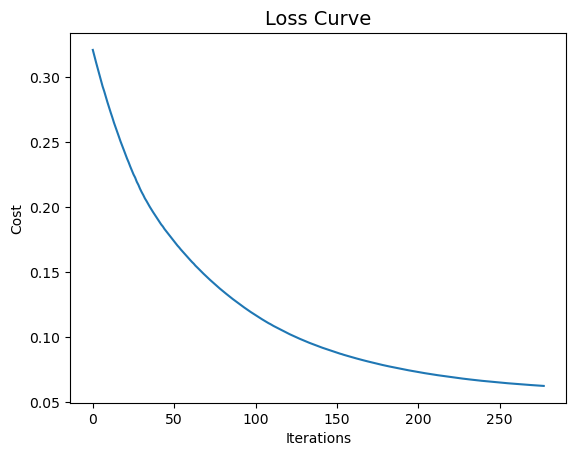

In [ ]:
# Vea qué tan bien fue el entrenamiento del modelo
plt.plot(mlp_reg.loss_curve_)
plt.title("Curva de Pérdida", fontsize=14)
plt.xlabel('Iteraciones')
plt.ylabel('Costo')
plt.show()

In [ ]:
# Vea qué tan bien fue la prueba del modelo
regression_res_df = pd.DataFrame({'Reales': y_test,'Predicciones': y_pred})

sn.scatterplot(regression_res_df)

c:\Users\chbas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: If using all scalar values, you must pass an index

## Definición de la búsqueda de hiper-parámetros

## Ejecución de la búsqueda de hiper-parámetros

## Entrenamiento del mejor modelo

## Prueba del mejor modelo

## Evaluación del mejor modelo